#Imports section

In [17]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm
import seaborn as sns

#Data fetcing

In [18]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#Data preview

##Data lookup

In [19]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"The lables are: {np.unique(y)}")
print("X preview\n",X)
print("Y preview\n",y)
print(f"Max feature value: {np.max(X)}")
print(f"Min feature value: {np.min(X)}")

Number of samples: 70000
Number of features: 784
The lables are: [0 1 2 3 4 5 6 7 8 9]
X preview
        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Max feature value: pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Min feature value: pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64


##Data distribution
We can see that the distribution is not uniform, it may effect the result (The digit 2 has the most training examples and digit 5 has the fewest)

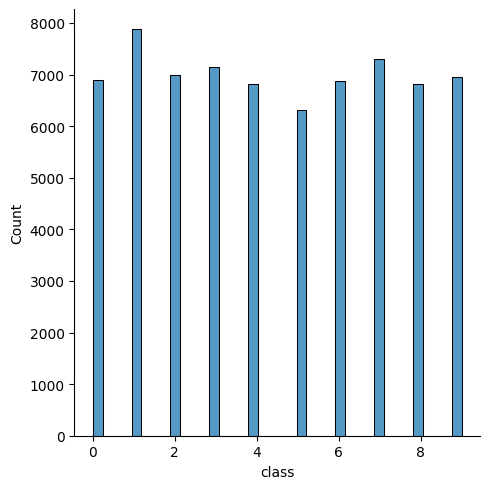

In [20]:
sns.displot(y)

#Data pre proccessing

##Normalization
Normalization process can improve our running time.
Since X values range is [0,255], we can normalize that by dividing in 255 such that each value will be in range of [0,1].

In [21]:
X /= 255
# Convert y from a pandas Series to a NumPy array
y = y.to_numpy()

# Add a bias term to the input features
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##Data partition

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y_onehot, test_size=0.2, random_state=42)

#Visualization

In [23]:
def show_acc_per_iteration(train_acc, test_acc):
  # Performance Visualization
  plt.figure(figsize=(10, 5))

  # Plot
  plt.plot(train_acc, label='Training ACC', color='blue')
  plt.plot(test_acc, '--', label='Test ACC', color='orange')
  plt.xlabel('Iteration')
  plt.ylabel('Accuracy')
  plt.title("Accuracy Per Iteration")
  plt.legend()
  plt.show()

In [24]:
def show_results(X_test, y_test, w):
  y_pred = softmax(X_test @ w)
  y_true_labels = np.argmax(y_test, axis=1)
  y_pred_labels = np.argmax(y_pred, axis=1)
  confusion_matrix = metrics.confusion_matrix(y_true_labels, y_pred_labels)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [i for i in range(10)])
  cm_display.plot()
  plt.show()
  print(f"ACC: {metrics.accuracy_score(y_true_labels, y_pred_labels):.2%}")
  return confusion_matrix

In [25]:
def show_results_per_digit(TP, FP, TN, FN):

  conf_mat = np.array([[TP, FP], [FN, TN]])

  accuracy = (TP + TN) / np.sum(conf_mat)
  sensitivity = TP / (TP + FN)
  recall = TP / (TP + FN)
  sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
              xticklabels=["Negative", "Positive"],
              yticklabels=["Negative", "Positive"])
  plt.title(f'Confusion Matrix with metrics for digit {digit}\n'+
  f'Accuracy: {accuracy:.2%}  Sensitivity: {sensitivity:.2%}  Recall: {recall:.2%}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

#Softmax Rigression model

B1. Minimize the following softmax cost function on the training data with respect to the vectors 𝑤𝑗
j=0,1,…,9 using the gradient descent method:
𝐸𝑖𝑛(𝑤) = − ∑ ∑ 1{𝑦𝑛 = 𝑘}log 𝑒
𝑤𝑘
𝑇𝑥𝑛
∑ 𝑒
𝑤𝑗
𝑇𝑥𝑛
𝑗
𝐾
𝑘=1
𝑁
𝑛=1
.

In the solution I used an iterative solution with gradient decent multipling by learning rate.

How to define a "good' learning rate?
In each iteration to avoid situation the delta between 2 iterations will pass the minimum and we want to decrease the step size.
I used a learning rate that get decreased by iterations like the middle picture below.

Becuse we can pass the minimum, I also save in pocket the best w (that gives the best acc).





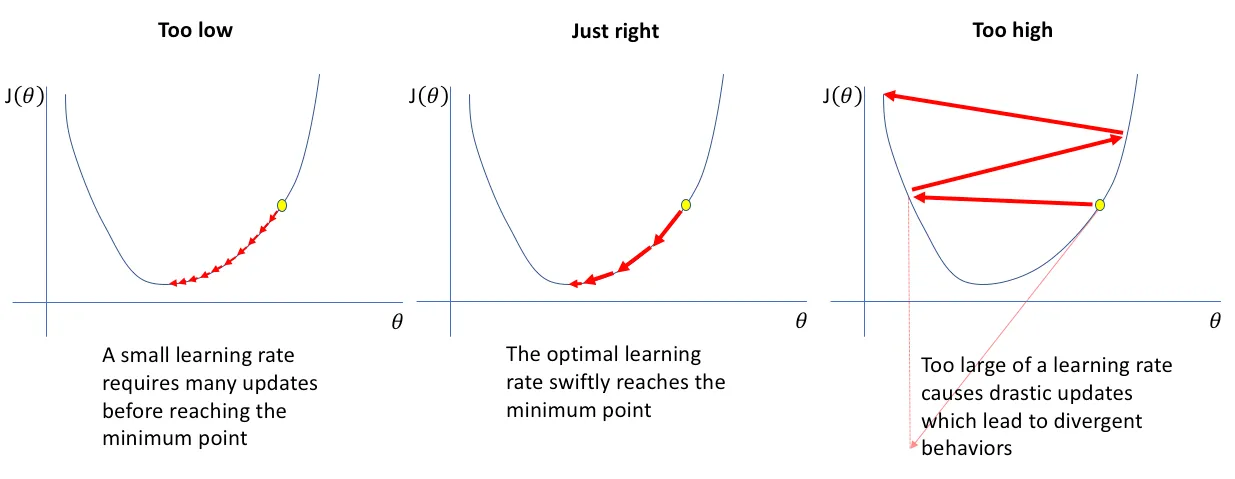

In [26]:
# Initialize parameters randomly
w = np.random.randn(X_train.shape[1], len(encoder.categories_[0]))

num_iterations = 100
learning_rate = 1
good_acc = 0.88  # We define 0.88 to decrease in each iteration the learning rate when we got accuracy that pass this value
train_acc = []
test_acc = []
pocket_w = w
best_acc = 0

# Softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def get_accuracy(X, y, w):
  # Make predictions
  y_pred = softmax(X @ w)
  # Convert predicted probabilities to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)
  # Convert one-hot encoded true labels to class labels
  y_true_labels = np.argmax(y, axis=1)
  # Evaluate the performance using accuracy score
  return accuracy_score(y_true_labels, y_pred_labels)

# Perform gradient descent
for i in tqdm(range(num_iterations)):
    # Calculate predictions and the gradient
    y_pred = softmax(X_train.dot(w))
    gradient = X_train.T.dot(y_pred - y_train)

    # Update parameters using gradient descent
    if best_acc > good_acc:
      w -= (learning_rate/(i+1)) * gradient
    else:
      w -= learning_rate * gradient

    train_acc.append(get_accuracy(X_train, y_train, w))
    test_accuracy = get_accuracy(X_test, y_test, w)
    test_acc.append(test_accuracy)


    if test_accuracy > best_acc:
      pocket_w = w.copy()
      best_acc = test_accuracy
      print(f"Accuracy: {best_acc:.4%}")


print(f"Final Accuracy: {get_accuracy(X_test, y_test, pocket_w):.2%}")

  1%|          | 1/100 [00:00<01:20,  1.23it/s]

Accuracy: 23.1429%


  2%|▏         | 2/100 [00:01<01:17,  1.26it/s]

Accuracy: 35.8071%


  3%|▎         | 3/100 [00:02<01:16,  1.26it/s]

Accuracy: 41.7071%


  5%|▌         | 5/100 [00:03<01:14,  1.28it/s]

Accuracy: 53.4357%


  8%|▊         | 8/100 [00:06<01:11,  1.28it/s]

Accuracy: 54.5429%


 10%|█         | 10/100 [00:08<01:27,  1.03it/s]

Accuracy: 58.4929%


 11%|█         | 11/100 [00:09<01:36,  1.09s/it]

Accuracy: 69.4643%


 12%|█▏        | 12/100 [00:11<01:40,  1.14s/it]

Accuracy: 69.6214%


 13%|█▎        | 13/100 [00:11<01:30,  1.04s/it]

Accuracy: 78.0214%


 14%|█▍        | 14/100 [00:12<01:22,  1.04it/s]

Accuracy: 80.4286%


 15%|█▌        | 15/100 [00:13<01:17,  1.10it/s]

Accuracy: 82.5071%


 17%|█▋        | 17/100 [00:15<01:10,  1.18it/s]

Accuracy: 83.8286%


 27%|██▋       | 27/100 [00:24<01:24,  1.15s/it]

Accuracy: 84.3643%


 28%|██▊       | 28/100 [00:25<01:14,  1.04s/it]

Accuracy: 86.2071%


 29%|██▉       | 29/100 [00:26<01:08,  1.03it/s]

Accuracy: 87.0071%


 30%|███       | 30/100 [00:26<01:03,  1.10it/s]

Accuracy: 87.7357%


 31%|███       | 31/100 [00:27<01:00,  1.14it/s]

Accuracy: 88.2357%


 33%|███▎      | 33/100 [00:29<00:56,  1.19it/s]

Accuracy: 88.2571%


 34%|███▍      | 34/100 [00:29<00:54,  1.22it/s]

Accuracy: 88.2786%


 36%|███▌      | 36/100 [00:31<00:50,  1.27it/s]

Accuracy: 88.3286%


 38%|███▊      | 38/100 [00:33<00:48,  1.28it/s]

Accuracy: 88.3429%


 40%|████      | 40/100 [00:34<00:48,  1.25it/s]

Accuracy: 88.3643%


 47%|████▋     | 47/100 [00:41<00:44,  1.18it/s]

Accuracy: 88.3714%


 48%|████▊     | 48/100 [00:42<00:43,  1.20it/s]

Accuracy: 88.3786%


 51%|█████     | 51/100 [00:44<00:39,  1.25it/s]

Accuracy: 88.3857%


 56%|█████▌    | 56/100 [00:49<00:42,  1.05it/s]

Accuracy: 88.3929%


 57%|█████▋    | 57/100 [00:50<00:46,  1.07s/it]

Accuracy: 88.4357%


 58%|█████▊    | 58/100 [00:51<00:48,  1.14s/it]

Accuracy: 88.4429%


 59%|█████▉    | 59/100 [00:52<00:42,  1.03s/it]

Accuracy: 88.4571%


 60%|██████    | 60/100 [00:54<00:46,  1.17s/it]

Accuracy: 88.4643%


 61%|██████    | 61/100 [00:55<00:48,  1.24s/it]

Accuracy: 88.4786%


 62%|██████▏   | 62/100 [00:56<00:42,  1.12s/it]

Accuracy: 88.5000%


 65%|██████▌   | 65/100 [00:58<00:32,  1.09it/s]

Accuracy: 88.5071%


 68%|██████▊   | 68/100 [01:01<00:26,  1.20it/s]

Accuracy: 88.5143%


 69%|██████▉   | 69/100 [01:02<00:29,  1.06it/s]

Accuracy: 88.5286%


 73%|███████▎  | 73/100 [01:06<00:26,  1.04it/s]

Accuracy: 88.5357%


 89%|████████▉ | 89/100 [01:20<00:09,  1.10it/s]

Accuracy: 88.5429%


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]

Final Accuracy: 88.54%


#Model Evaluation

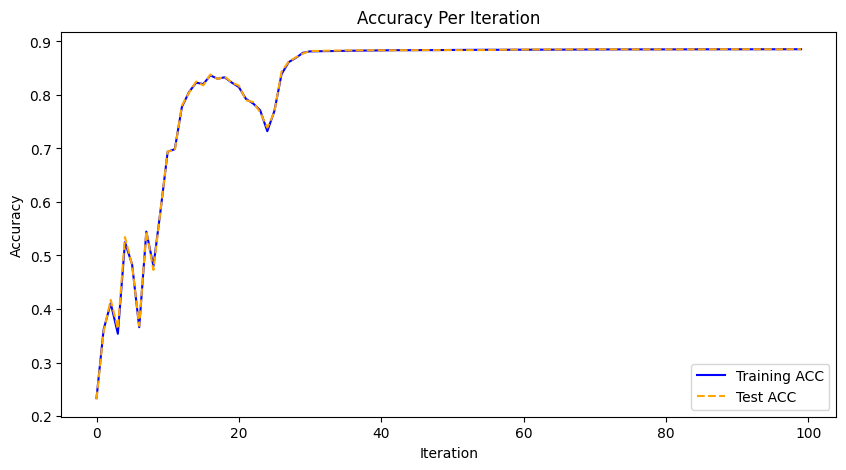

In [27]:
# We can see in the graph the monotony after we pass the 'good_acc' value, because the learning rate is decreasing online
show_acc_per_iteration(train_acc, test_acc)

##B2. Calculate confusion matrix and accuracy (ACC) for the multi-class classification problem on the test data.

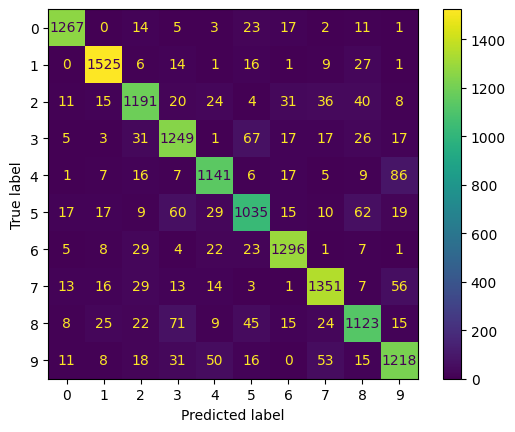

ACC: 88.54%


In [28]:
confusion_matrix = show_results(X_test, y_test, pocket_w)

##B3. Calculate the table of confusion for each digit and compute sensitivity (TPR) for each class.

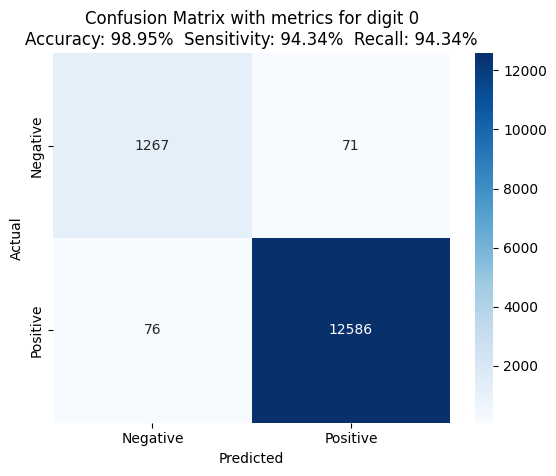

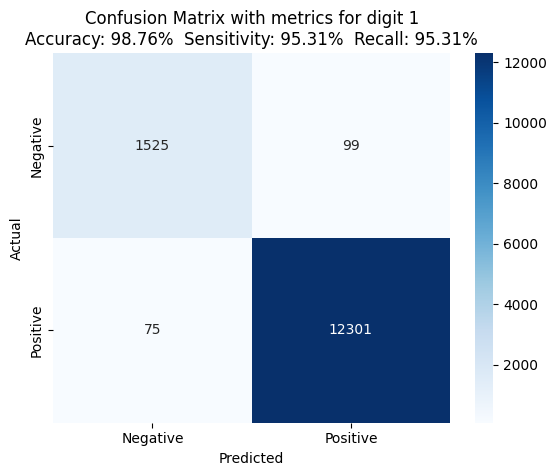

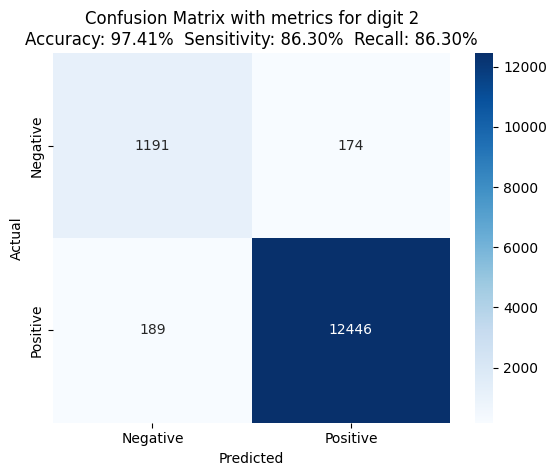

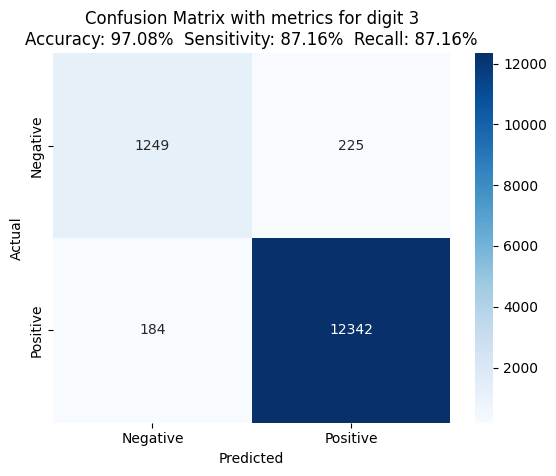

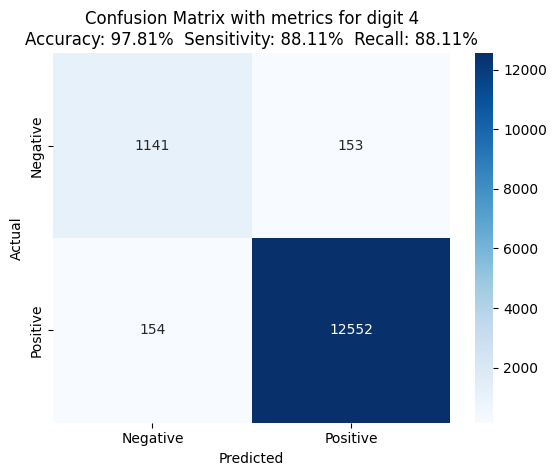

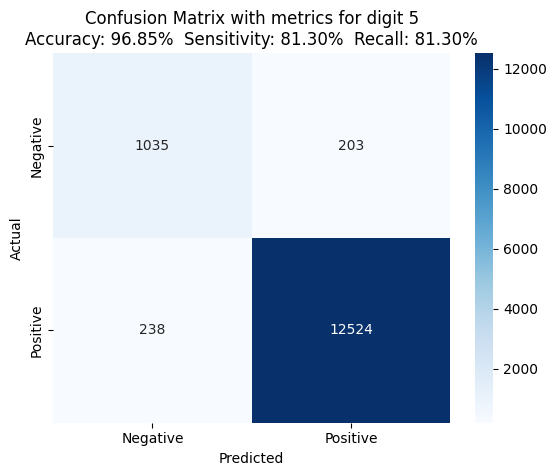

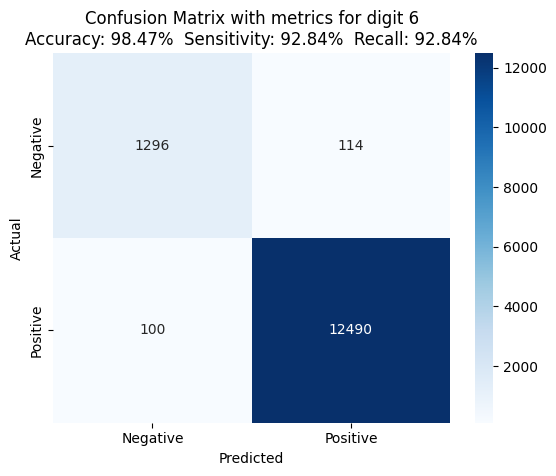

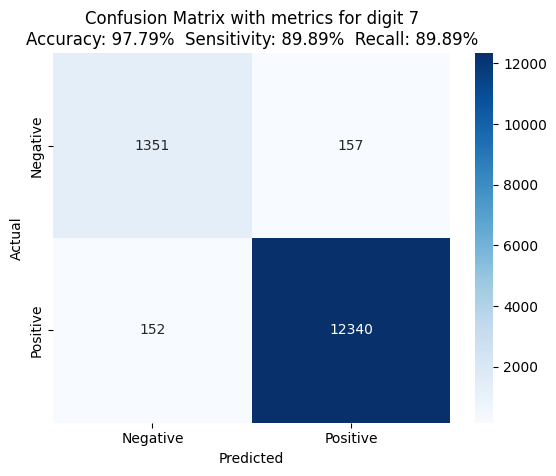

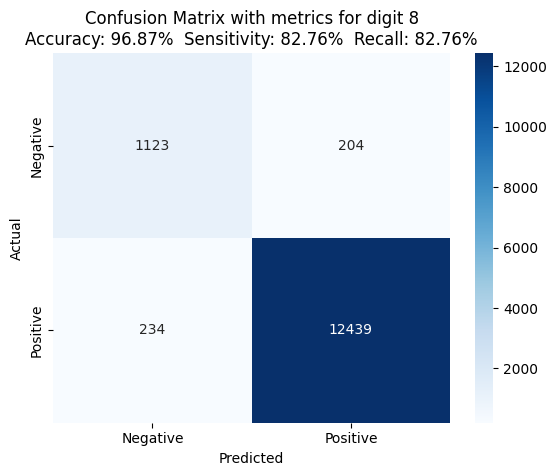

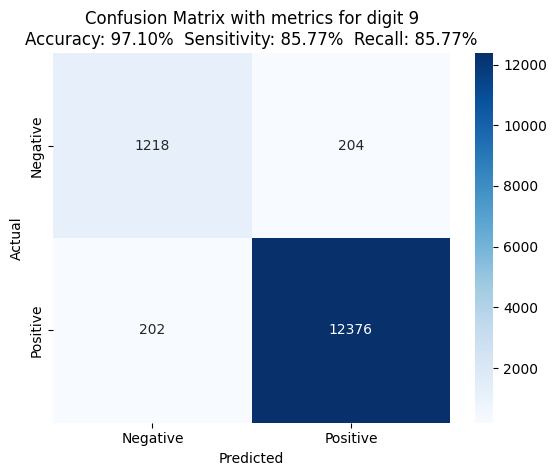

In [29]:
for digit in range(10):
    row_sum = np.sum(confusion_matrix[digit, :])
    col_sum = np.sum(confusion_matrix[:, digit])
    TP = confusion_matrix[digit, digit]
    FN = row_sum - TP
    FP = col_sum - TP
    TN = np.sum(confusion_matrix) - row_sum - col_sum + TP

    show_results_per_digit(TP, FP, TN, FN)

#B4. Discuss the results
We can see from the results that we got a predictor with high accuracy for the multiclass problem (85%+ ACC with only 100 iterations).

We used the gradient decent in our solution to minimize the cost function with learning rate that change online (decrease by iterations) and we also save the best w, because we can get far from the optimum value over time.

In conclusion the softmax regression can be a good model for digits classification like MNIST.